In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data=pd.read_csv('modified_farming_data.csv')

In [50]:
data.head()

,Farmer ID,Region,Farm Size (ha),Crop Type,Annual Income (INR),Age Group,Tech Adoption,Primary Farming Method,Mobile Availability,Computer Availability,Irrigation Type,Has Mobile/Computer
0,1,East,7.4,Sugarcane,240710,56+,Medium,Traditional,True,True,Rain-fed,True
1,2,West,7.8,Sugarcane,266139,36-55,Low,Traditional,True,False,Sprinkler,False
2,3,North,1.2,Sugarcane,117215,56+,High,Organic,True,True,Canal,True
3,4,East,3.9,Sugarcane,381186,18-35,High,Organic,True,False,Sprinkler,True
4,5,East,1.6,Cotton,194356,18-35,Low,Organic,True,True,Sprinkler,True


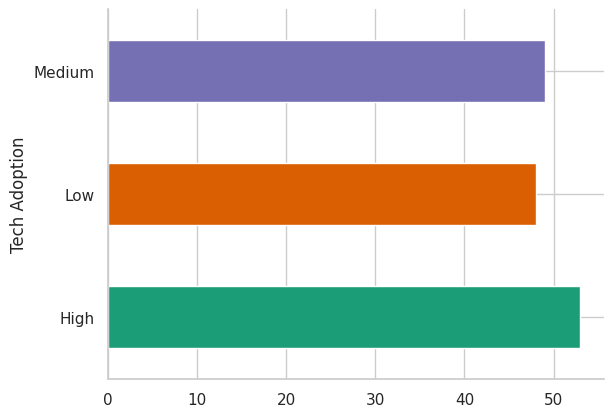

In [51]:

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Tech Adoption').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

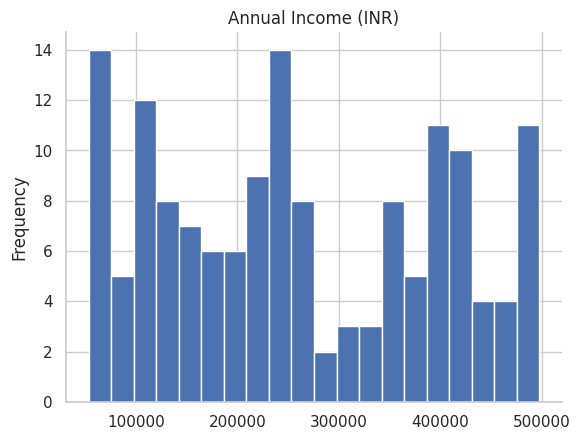

In [52]:


from matplotlib import pyplot as plt
data['Annual Income (INR)'].plot(kind='hist', bins=20, title='Annual Income (INR)')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-53-c7a4284db2da>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=data, palette="Set2")


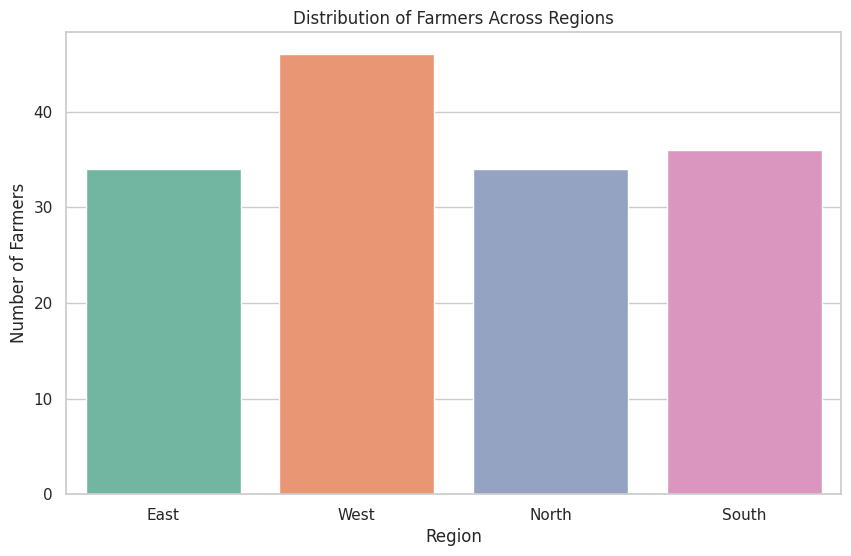

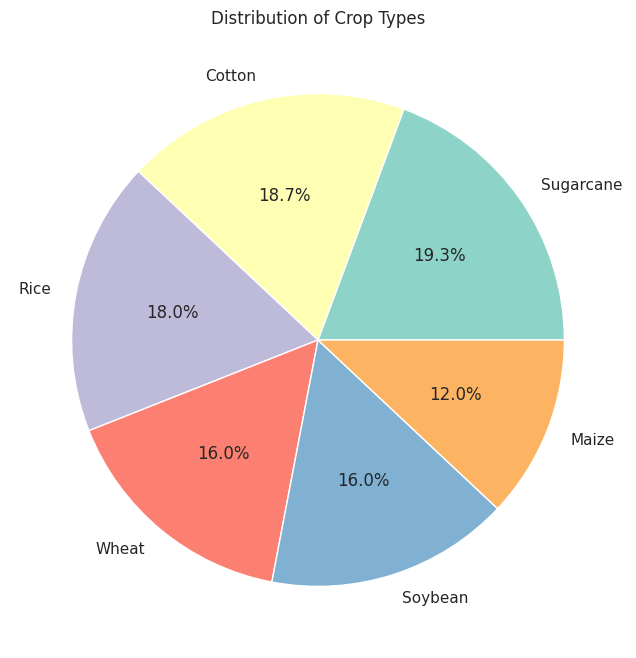

<ipython-input-53-c7a4284db2da>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Annual Income (INR)', data=data, palette="Set2")


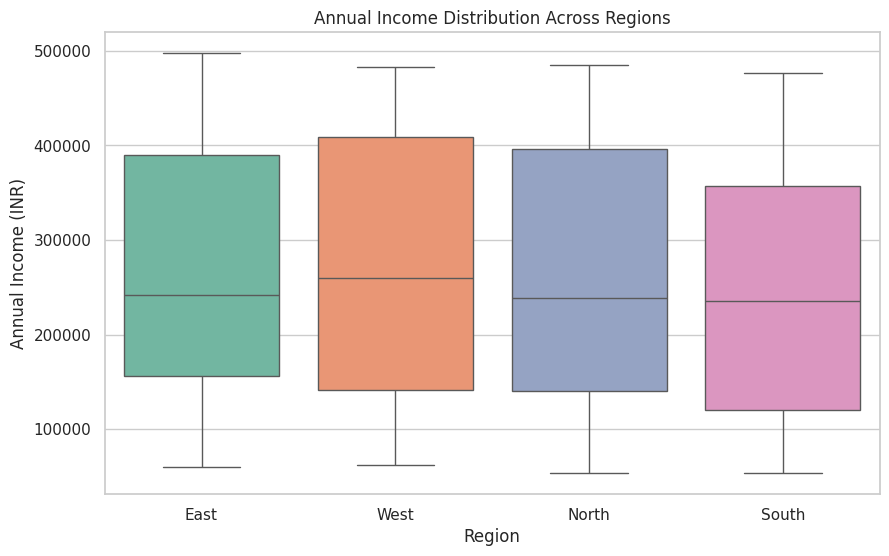

<ipython-input-53-c7a4284db2da>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tech Adoption', data=data, palette="Set2")


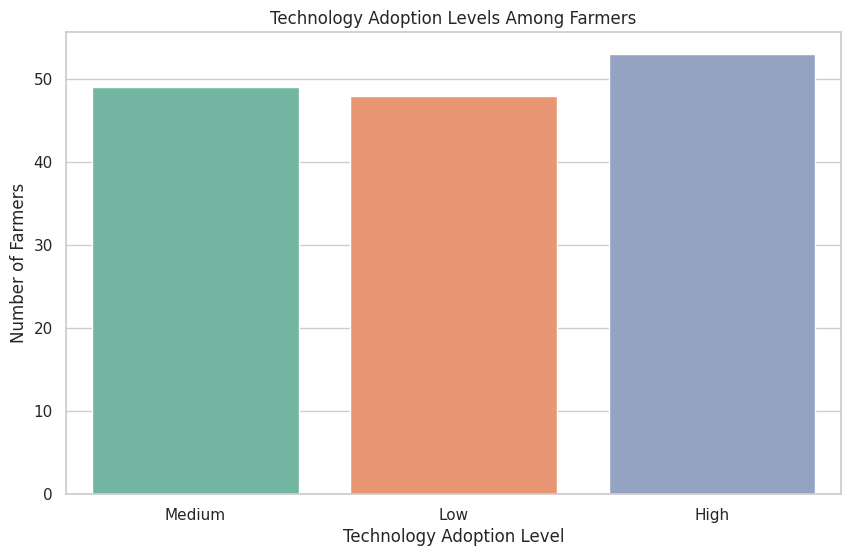

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization style
sns.set(style="whitegrid")

# Bar plot: Distribution of farmers across regions
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=data, palette="Set2")
plt.title('Distribution of Farmers Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Farmers')
plt.show()

# Pie chart: Distribution of crop types
plt.figure(figsize=(8, 8))
crop_type_distribution = data['Crop Type'].value_counts()
plt.pie(crop_type_distribution, labels=crop_type_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Crop Types')
plt.show()

# Box plot: Annual Income across Regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Annual Income (INR)', data=data, palette="Set2")
plt.title('Annual Income Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Annual Income (INR)')
plt.show()

# Bar plot: Technology Adoption Levels
plt.figure(figsize=(10, 6))
sns.countplot(x='Tech Adoption', data=data, palette="Set2")
plt.title('Technology Adoption Levels Among Farmers')
plt.xlabel('Technology Adoption Level')
plt.ylabel('Number of Farmers')
plt.show()


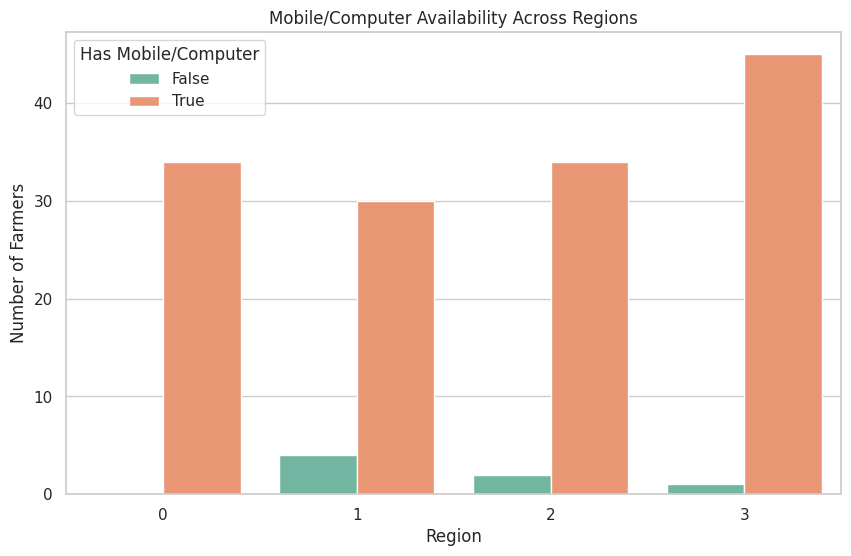

,Has Mobile/Computer
Region,
0,100.000000
1,88.235294
2,94.444444
3,97.826087


In [66]:
data['Has Mobile/Computer'] = (data['Mobile Availability'] == True) | (data['Computer Availability'] == True)

# Bar plot: Mobile/Computer availability across regions
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', hue='Has Mobile/Computer', data=data, palette='Set2')
plt.title('Mobile/Computer Availability Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Farmers')
plt.legend(title='Has Mobile/Computer')
plt.show()

# Now, find the region with the highest percentage of mobile/computer availability
region_availability = data.groupby('Region')['Has Mobile/Computer'].mean() * 100
region_availability

In [55]:
# prompt: show the categorical columns

categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_columns)


Categorical columns:
Index(['Region', 'Crop Type', 'Age Group', 'Tech Adoption',
       'Primary Farming Method', 'Irrigation Type'],
      dtype='object')


In [56]:


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

print(data.head())


   Farmer ID  Region  Farm Size (ha)  Crop Type  Annual Income (INR)  \
0          1       0             7.4          4               240710   
1          2       3             7.8          4               266139   
2          3       1             1.2          4               117215   
3          4       0             3.9          4               381186   
4          5       0             1.6          0               194356   

   Age Group  Tech Adoption  Primary Farming Method  Mobile Availability  \
0          2              2                       2                 True   
1          1              1                       2                 True   
2          2              0                       0                 True   
3          0              0                       0                 True   
4          0              1                       0                 True   

   Computer Availability  Irrigation Type  Has Mobile/Computer  
0                   True                2    

In [57]:
data.corr()

,Farmer ID,Region,Farm Size (ha),Crop Type,Annual Income (INR),Age Group,Tech Adoption,Primary Farming Method,Mobile Availability,Computer Availability,Irrigation Type,Has Mobile/Computer
Farmer ID,1.000000,0.054676,0.008103,-0.035017,0.039418,-0.085390,0.099754,-0.045285,-0.057956,-0.060393,-0.097915,NaN
Region,0.054676,1.000000,0.012733,-0.221471,0.006042,-0.035205,0.060334,0.054099,-0.047198,0.067558,0.031388,NaN
Farm Size (ha),0.008103,0.012733,1.000000,0.017151,-0.034035,0.005024,-0.008106,-0.086785,0.009624,0.130085,0.143831,NaN
Crop Type,-0.035017,-0.221471,0.017151,1.000000,0.098821,-0.091412,-0.069948,0.149851,0.082506,-0.006224,-0.049935,NaN
Annual Income (INR),0.039418,0.006042,-0.034035,0.098821,1.000000,-0.113693,0.079891,0.057665,0.081890,0.082976,-0.008246,NaN
Age Group,-0.085390,-0.035205,0.005024,-0.091412,-0.113693,1.000000,-0.023769,0.076699,-0.122435,0.022029,0.020791,NaN
Tech Adoption,0.099754,0.060334,-0.008106,-0.069948,0.079891,-0.023769,1.000000,-0.092776,0.118262,-0.051285,-0.061120,NaN
Primary Farming Method,-0.045285,0.054099,-0.086785,0.149851,0.057665,0.076699,-0.092776,1.000000,0.091308,0.025022,-0.058905,NaN
Mobile Availability,-0.057956,-0.047198,0.009624,0.082506,0.081890,-0.122435,0.118262,0.091308,1.000000,-0.217460,0.037113,NaN
Computer Availability,-0.060393,0.067558,0.130085,-0.006224,0.082976,0.022029,-0.051285,0.025022,-0.217460,1.000000,-0.090674,NaN


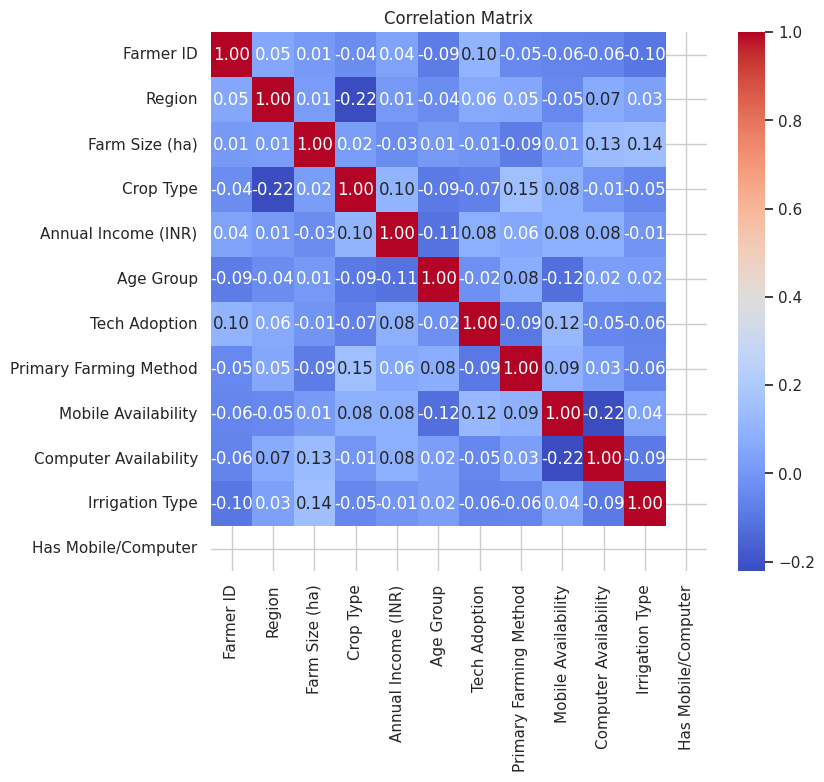

In [58]:
# prompt: sns heatmap for corr table

plt.figure(figsize=(8, 7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [60]:
features = data[['Farm Size (ha)', 'Annual Income (INR)', 'Tech Adoption']]

In [61]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

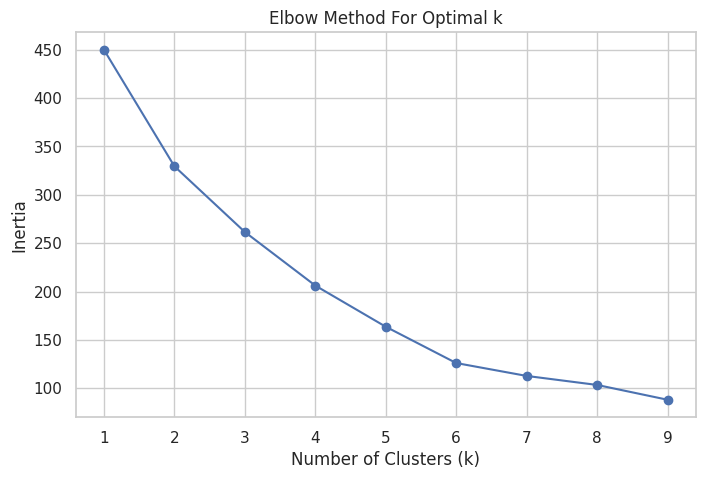

In [62]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [63]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

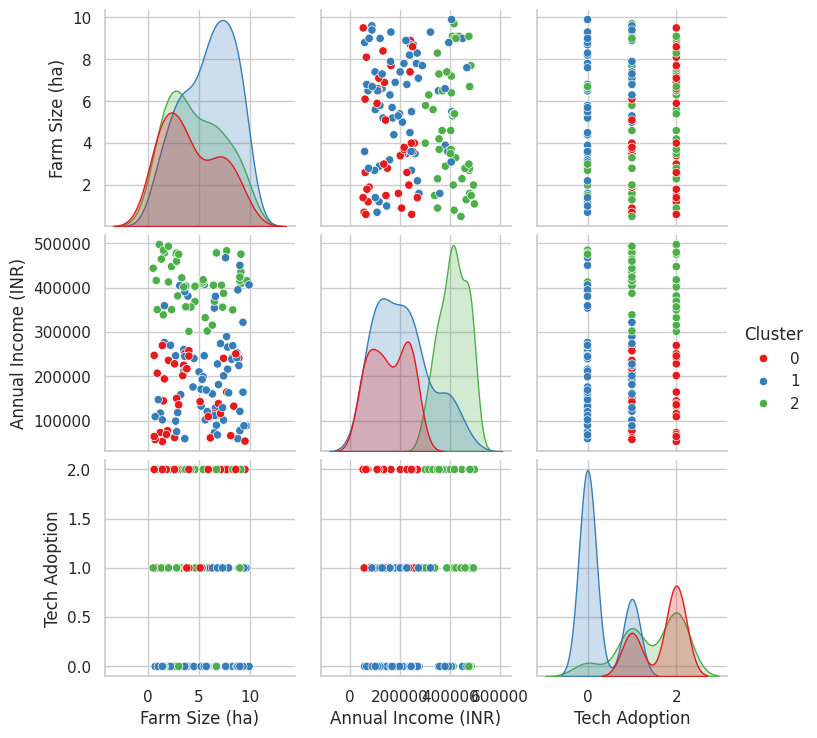

In [64]:
sns.pairplot(data, hue='Cluster', vars=['Farm Size (ha)', 'Annual Income (INR)', 'Tech Adoption'], palette='Set1')
plt.show()

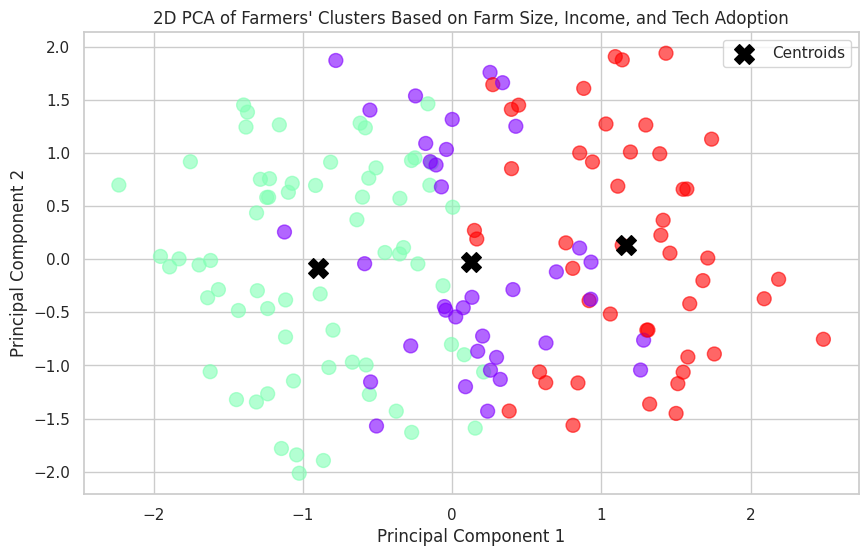

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plot the PCA result with clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans.labels_, cmap='rainbow', s=100, alpha=0.6)

# Plot the centroids (projected into 2D space)
centroids_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], color='black', s=200, marker='X', label='Centroids')

# Add title and labels
plt.title('2D PCA of Farmers\' Clusters Based on Farm Size, Income, and Tech Adoption')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()